In [52]:
# Import the dependencies.
import pandas as pd
import matplotlib as plt
import numpy as np
from citipy import citipy

In [53]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [54]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [55]:
coordinates

[(19.634477312443295, -147.07039970446232),
 (88.38515023513443, -178.9113837151041),
 (64.59601859687942, 12.393663660662952),
 (-52.13226071097091, -35.17057469192787),
 (54.23653833933952, -126.28475530251107),
 (-7.205238938079916, -19.647885417803764),
 (77.28747456102843, 62.57648430429694),
 (-35.93025882769575, -50.44193161291486),
 (56.69064047602325, -31.816491600073448),
 (59.82486146592112, 172.599282520097),
 (65.90864341060856, -119.66425320261621),
 (86.1356604600432, -16.12200192649871),
 (-9.26693620307941, -73.44901474877392),
 (76.49058337234632, -171.6167609087856),
 (76.83355613155905, 62.271855535893195),
 (-68.14902813873425, 130.70474258344478),
 (33.14979239421626, -46.10931312990763),
 (-27.20192361275256, -153.838975109849),
 (84.62957759492699, 134.56902540246585),
 (66.685459314724, -8.200027450245045),
 (28.99126483074143, -132.2252371802736),
 (-32.948700784231505, 110.46337372650987),
 (-67.70771055611165, -174.62383730275653),
 (-16.062416355038096, -12

In [56]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
len(cities)



629

In [57]:
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
from config import weather_api_key
#create url api and print the url
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73f9b4b092bc4cc6602310e64c1f5747


In [58]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [59]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | grong
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | houston
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | tilichiki
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | porto walter
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | avera
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | vestmanna
Processing Record 18 of Set 1 | pacific grove
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of 

Processing Record 37 of Set 4 | port alfred
Processing Record 38 of Set 4 | vila franca do campo
Processing Record 39 of Set 4 | oistins
Processing Record 40 of Set 4 | umm durman
City not found. Skipping...
Processing Record 41 of Set 4 | daniel flores
Processing Record 42 of Set 4 | quelimane
Processing Record 43 of Set 4 | paita
Processing Record 44 of Set 4 | tucupita
Processing Record 45 of Set 4 | baragua
Processing Record 46 of Set 4 | los llanos de aridane
Processing Record 47 of Set 4 | tocopilla
Processing Record 48 of Set 4 | samusu
City not found. Skipping...
Processing Record 49 of Set 4 | glendive
Processing Record 50 of Set 4 | codrington
Processing Record 1 of Set 5 | kununurra
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | palmer
Processing Record 4 of Set 5 | verkhoyansk
Processing Record 5 of Set 5 | consett
Processing Record 6 of Set 5 | miguel calmon
Processing Record 7 of Set 5 | bandarbeyla
Processing Record 8 of Set 5 | mahebourg
Proc

Processing Record 22 of Set 8 | rio gallegos
Processing Record 23 of Set 8 | pinawa
Processing Record 24 of Set 8 | yueyang
Processing Record 25 of Set 8 | laguna de perlas
Processing Record 26 of Set 8 | banjar
Processing Record 27 of Set 8 | esperance
Processing Record 28 of Set 8 | andros town
Processing Record 29 of Set 8 | saint-leu
Processing Record 30 of Set 8 | sonoita
Processing Record 31 of Set 8 | riyadh
Processing Record 32 of Set 8 | kulhudhuffushi
Processing Record 33 of Set 8 | darnah
Processing Record 34 of Set 8 | aykhal
Processing Record 35 of Set 8 | radhanpur
Processing Record 36 of Set 8 | buala
Processing Record 37 of Set 8 | iqaluit
Processing Record 38 of Set 8 | mizdah
Processing Record 39 of Set 8 | mayo
Processing Record 40 of Set 8 | weihai
Processing Record 41 of Set 8 | elista
Processing Record 42 of Set 8 | half moon bay
Processing Record 43 of Set 8 | ingham
Processing Record 44 of Set 8 | abadan
Processing Record 45 of Set 8 | zilair
Processing Record 4

City not found. Skipping...
Processing Record 14 of Set 12 | kavkazskiy
Processing Record 15 of Set 12 | turayf
Processing Record 16 of Set 12 | evensk
Processing Record 17 of Set 12 | maxixe
Processing Record 18 of Set 12 | nuevo progreso
Processing Record 19 of Set 12 | manaus
Processing Record 20 of Set 12 | kuremaa
Processing Record 21 of Set 12 | laguna
Processing Record 22 of Set 12 | brae
Processing Record 23 of Set 12 | wanning
Processing Record 24 of Set 12 | yanan
City not found. Skipping...
Processing Record 25 of Set 12 | kuche
City not found. Skipping...
Processing Record 26 of Set 12 | zyryanka
Processing Record 27 of Set 12 | gigmoto
Processing Record 28 of Set 12 | xingcheng
Processing Record 29 of Set 12 | okhotsk
Processing Record 30 of Set 12 | rawson
Processing Record 31 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 32 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 33 of Set 12 | pisco
Processing Record 34 of Set 12 

In [60]:
len(city_data)

574

In [61]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df=pd.DataFrame(city_data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,73.40,83,90,6.26,US,2021-01-27 21:06:55
1,Grong,64.4654,12.3149,28.40,86,75,9.22,NO,2021-01-27 21:06:56
2,Chuy,-33.6971,-53.4616,76.68,77,3,12.62,UY,2021-01-27 21:06:56
3,Houston,29.7633,-95.3633,68.00,24,1,23.02,US,2021-01-27 21:05:44
4,Georgetown,5.4112,100.3354,78.01,94,40,2.30,MY,2021-01-27 21:06:56
5,Tasiilaq,65.6145,-37.6368,21.20,45,75,25.32,GL,2021-01-27 21:03:16
6,Tilichiki,60.4667,166.1000,-11.15,91,92,9.04,RU,2021-01-27 21:06:57
7,Yellowknife,62.4560,-114.3525,-9.00,70,90,2.30,CA,2021-01-27 21:06:57
8,Porto Walter,-8.2686,-72.7439,87.21,56,10,4.92,BR,2021-01-27 21:06:57
9,New Norfolk,-42.7826,147.0587,57.00,58,99,1.01,AU,2021-01-27 21:06:57


In [62]:
new_column=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-01-27 21:06:55,19.7297,-155.0900,73.40,83,90,6.26
1,Grong,NO,2021-01-27 21:06:56,64.4654,12.3149,28.40,86,75,9.22
2,Chuy,UY,2021-01-27 21:06:56,-33.6971,-53.4616,76.68,77,3,12.62
3,Houston,US,2021-01-27 21:05:44,29.7633,-95.3633,68.00,24,1,23.02
4,Georgetown,MY,2021-01-27 21:06:56,5.4112,100.3354,78.01,94,40,2.30
...,...,...,...,...,...,...,...,...,...
569,Roma,US,2021-01-27 21:04:07,43.2128,-75.4557,28.99,69,90,6.91
570,Venado Tuerto,AR,2021-01-27 21:09:06,-33.7456,-61.9688,95.00,14,0,3.00
571,Ituango,CO,2021-01-27 21:09:06,7.1712,-75.7640,68.50,88,92,3.13
572,Malatya,TR,2021-01-27 21:09:06,38.5000,38.0000,46.40,42,75,6.91


In [63]:
# Create the output file (CSV).
output_data_file="weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [64]:
# Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

In [65]:
# Import the time module.
import time
today=time.time()
today

1611781746.8949518

In [66]:
# Get today's date in seconds.
today=time.strftime("%x")
today

'01/27/21'

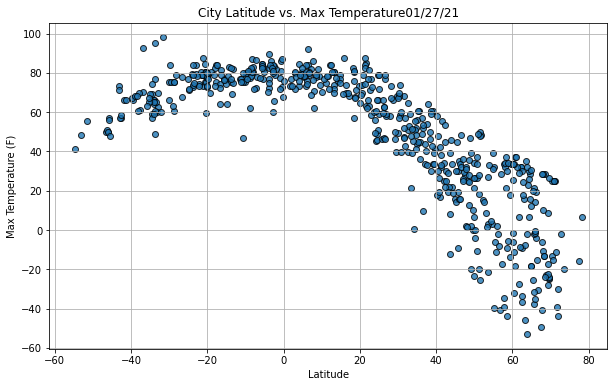

In [67]:
import time
import matplotlib.pyplot as plt
import numpy as np
# Build the scatter plot for latitude vs. max temperature.
plt.subplots(figsize=(10,6))
plt.scatter(lats,max_temps,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")
plt.title(f"City Latitude vs. Max Temperature"+time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")
plt.show()



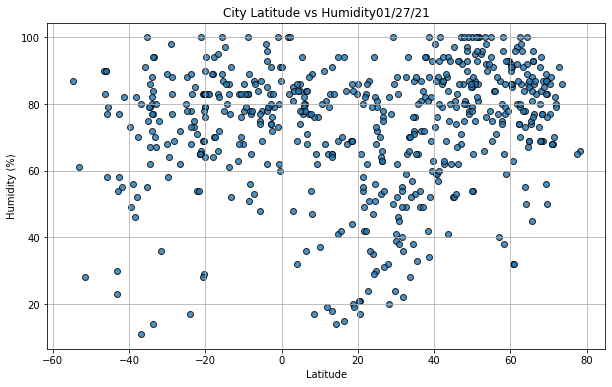

In [68]:
plt.subplots(figsize=(10,6))
#add scatter plot, change color, marker, linewidth
plt.scatter(lats,humidity,alpha=0.8,edgecolor="Black",marker="o",linewidths=1,label="Cities")
#add title and axis labels
plt.title(f"City Latitude vs Humidity" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
#save the scatter plot
plt.savefig("weather_data/Fig2.png")
#show the plot
#plt.show()

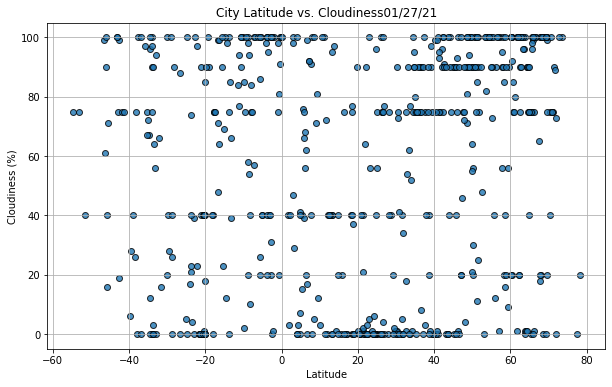

In [69]:
plt.subplots(figsize=(10,6))
#add scatter plot, change color, marker, linewidth
plt.scatter(lats,cloudiness,alpha=0.8,edgecolor="Black",marker="o",linewidths=1,label="Cities")
plt.title(f"City Latitude vs. Cloudiness"+time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
#Save the plot
plt.savefig("weather_data/Fig3.png")
#show the plot
plt.show()



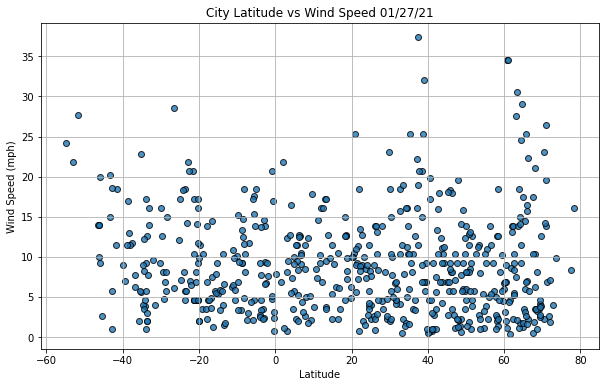

In [70]:
# Build the scatter plots for latitude vs. wind speed.
plt.subplots(figsize=(10,6))
plt.scatter(lats,wind_speed,alpha=0.8,edgecolor="Black",marker="o",linewidths=1,label="Cities")
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
#save the plot
plt.savefig("weather_data/Fig3.png")
#show the plot
plt.show()

In [72]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates)

In [73]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [76]:
index13=city_data_df.loc[13]
index13

City                Pacific Grove
Country                        US
Date          2021-01-27 21:06:58
Lat                       36.6177
Lng                      -121.917
Max Temp                       52
Humidity                       81
Cloudiness                     90
Wind Speed                  12.66
Name: 13, dtype: object

In [77]:
city_data_df["Lat"]>=0

0       True
1       True
2      False
3       True
4       True
       ...  
569     True
570    False
571     True
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [83]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Chuy,UY,2021-01-27 21:06:56,-33.6971,-53.4616,76.68,77,3,12.62
8,Porto Walter,BR,2021-01-27 21:06:57,-8.2686,-72.7439,87.21,56,10,4.92
9,New Norfolk,AU,2021-01-27 21:06:57,-42.7826,147.0587,57.00,58,99,1.01
14,Busselton,AU,2021-01-27 21:06:59,-33.6500,115.3333,48.99,84,0,1.99
15,Vaini,TO,2021-01-27 21:03:05,-21.2000,-175.2000,73.40,100,90,10.36
...,...,...,...,...,...,...,...,...,...
559,Natal,BR,2021-01-27 21:09:03,-5.7950,-35.2094,82.40,74,20,17.27
564,Iquique,CL,2021-01-27 21:09:04,-20.2208,-70.1431,73.40,64,0,16.11
566,Honiara,SB,2021-01-27 21:09:05,-9.4333,159.9500,81.09,79,100,9.37
570,Venado Tuerto,AR,2021-01-27 21:09:06,-33.7456,-61.9688,95.00,14,0,3.00


In [84]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-01-27 21:06:55,19.7297,-155.0900,73.40,83,90,6.26
1,Grong,NO,2021-01-27 21:06:56,64.4654,12.3149,28.40,86,75,9.22
3,Houston,US,2021-01-27 21:05:44,29.7633,-95.3633,68.00,24,1,23.02
4,Georgetown,MY,2021-01-27 21:06:56,5.4112,100.3354,78.01,94,40,2.30
5,Tasiilaq,GL,2021-01-27 21:03:16,65.6145,-37.6368,21.20,45,75,25.32
...,...,...,...,...,...,...,...,...,...
567,Inta,RU,2021-01-27 21:09:05,66.0317,60.1659,-0.42,93,100,16.51
568,Gravelbourg,CA,2021-01-27 21:09:05,49.8834,-106.5512,6.80,78,64,13.80
569,Roma,US,2021-01-27 21:04:07,43.2128,-75.4557,28.99,69,90,6.91
571,Ituango,CO,2021-01-27 21:09:06,7.1712,-75.7640,68.50,88,92,3.13


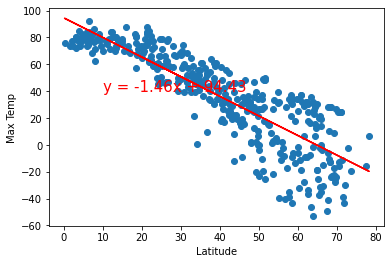

In [86]:
# Linear regression on the Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

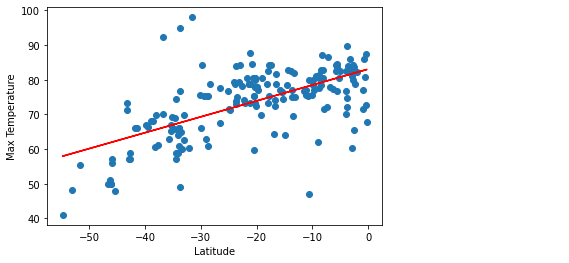

(0.4583002945008443, 83.04766089729948, 0.6202137109636421, 1.6245437592338342e-20, 0.043446476871924856)


In [124]:
# Linear regression on the Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature","Max Temperature",(10,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print((slope, intercept, r_value, p_value, std_err))

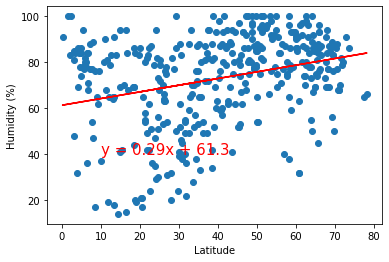

(0.04732429438651567,
 0.04732429438651567,
 0.2958671074501352,
 0.04732429438651567,
 0.04732429438651567)

In [123]:
# Linear regression on the humidity in the Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere \n for Humidity (%)","Humidity (%)",(10,40))
(_, _, r_value, _, _) = linregress(x_values, y_values)
(_, _, r_value, _, _)

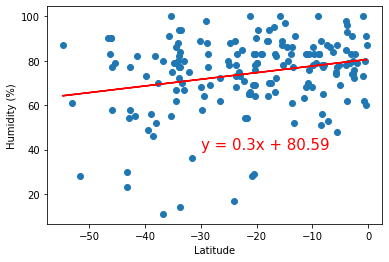

(0.29943647833986864, 80.59140659172576, 0.24391340250597351, 0.0009681466439538096, 0.08923595672677591)


In [122]:
# Linear regression on the humidity in the Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere \n for Humidity (%)","Humidity (%)",(-30,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print((slope, intercept, r_value, p_value, std_err))

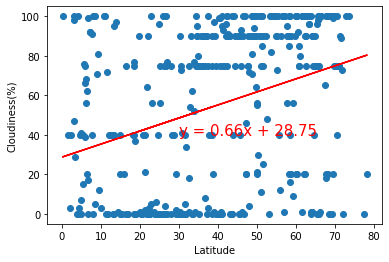

In [116]:
# Linear regression on the cloudiness in the Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Linear regression on the Northern Hemisphere \n for Cloudiness (%)","Cloudiness(%)",(30,40))







In [117]:
#cloudiness r_value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)



(0.6594366019931998,
 28.746518762108728,
 0.3327858739562956,
 1.2118075858339745e-11,
 0.09437955799077766)

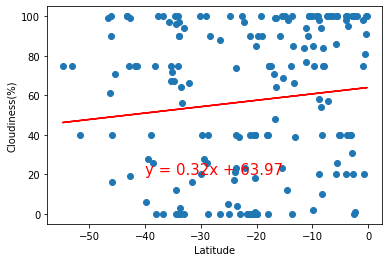

In [125]:
# Linear regression on the cloudiness in the Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere \n Cloudiness (%)","Cloudiness(%)",(-40,20))


In [121]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

(0.32368663954192867,
 63.96848892691748,
 0.11656187684932448,
 0.11917084440226614,
 0.20672248025624007)

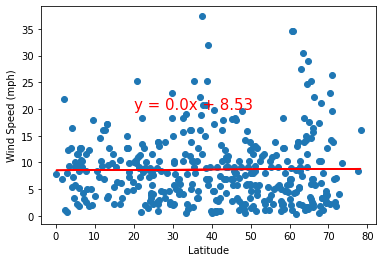

(0.003905434313641518, 8.529801499871375, 0.012301838032388664, 0.8076816832520395, 0.016033319056547604)


In [134]:
# Linear regression on the wind speed in the Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere \n Wind speed (mph)","Wind Speed (mph)",(20,20))


(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print((slope, intercept, r_value, p_value, std_err))




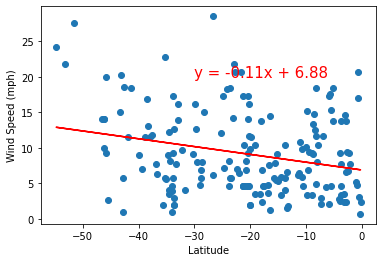

(-0.10973562292987632, 6.877014634216261, -0.2539238659162185, 0.0005826555131827794, 0.0313300630419645)


In [141]:
# Linear regression on the wind speed in the Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Linear regression on the Southern Hemisphere \n Wind Speed (mph)","Wind Speed (mph)",(-30,20))


(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print((slope, intercept, r_value, p_value, std_err))
